In [113]:
collection = "tweets_fernandezfernandez"

In [114]:
import pandas as pd

%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)

In [115]:
tweets = pd.read_csv('./csvs/%s_tweets.csv' % collection, encoding='utf8')

In [116]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                      format="%a %b %d %H:%M:%S +0000 %Y")

# Total de tuits

In [117]:
len(tweets)

102703

# Algunos ejemplos

In [118]:
tweets.head(10)

,id,created_at,text,favorited,retweeted,user_name,user_id,mentions,hts,original_id,full_text,favorite_count,retweet_count
0,1129796443533905921,2019-05-18 17:10:37,RT @NuncaMasK2019: ALBERTO FERNÁNDEZ sobre CRISTINA KIRCHNER Una persona sin valores actúa siguiendo su ambición de poder y dinero. ¡Dale…,False,False,silvina,218159646,NuncaMasK2019,NaN,1129754910030016515,ALBERTO FERNÁNDEZ sobre CRISTINA KIRCHNER Una persona sin valores actúa siguiendo su ambición de poder y dinero. ¡Dale RT para DIFUNDIR! #ArrugoCristina https://t.co/jeZO9zvSNF,836,951
1,1129796444729368576,2019-05-18 17:10:37,"RT @felipe_sola: Mi candidatura tenía una única misión: construir una unidad amplia para defender al trabajo, a los humildes y a la clase m…",False,False,Tonga,144904500,felipe_sola,NaN,1129761247359057922,"Mi candidatura tenía una única misión: construir una unidad amplia para defender al trabajo, a los humildes y a la clase media. Ese objetivo está cumplido. Celebro la decisión de Cristina. Felicito a Alberto. #EsConTodos",14194,3065
2,1129796445991837696,2019-05-18 17:10:37,"180 mil millones de dólares de deuda en cimientos, ahora hay que garparlos Pinedo, contate otro.… https://t.co/3tHk0FIwCf",False,False,Guillermo Sordo,319594285,NaN,NaN,1129796445991837696,"180 mil millones de dólares de deuda en cimientos, ahora hay que garparlos Pinedo, contate otro. #FernandezFernandez #CristinaSomosTodos",0,0
3,1129796448718065666,2019-05-18 17:10:38,"RT @peppa1963: @rag_HLVS Se lo van a cargar al pobre títere de Alberto Fernández.... ""Que parezca un accidente......"" #ArrugoCristina #Buen…",False,False,Silvia Berth,837648053968457728,peppa1963 rag_HLVS,ArrugoCristina,1129789421904158721,"@rag_HLVS Se lo van a cargar al pobre títere de Alberto Fernández.... ""Que parezca un accidente......"" #ArrugoCristina #BuenSabado",1,1
4,1129796456632729600,2019-05-18 17:10:40,"RT @ProfetaArgen: Macrista: Cristina tiene que bajarse, que no sea soberbia Also Macrista: #ArrugoCristina",False,False,Fede Schoeller,302339856,ProfetaArgen,ArrugoCristina,1129764924924878850,"Macrista: Cristina tiene que bajarse, que no sea soberbia Also Macrista: #ArrugoCristina",294,74
5,1129796454904676353,2019-05-18 17:10:40,"#ArrugoCristina 😂😂 Que los tiempos del Kirchnerismo vuelva es necesario. La de como con tácticas electorales, no in… https://t.co/1pCQBvk1Kf",False,False,Ainurdearda,994007063960473600,NaN,ArrugoCristina,1129796454904676353,"#ArrugoCristina 😂😂 Que los tiempos del Kirchnerismo vuelva es necesario. La de como con tácticas electorales, no inmporta. Ya ni con todo el blindaje periodístico el cinismo, narcisismo del neoliberalismos corrupto mafioso y cipayos vende patria podrán. Volver los pone nervioso https://t.co/a1qkHOF665",0,0
6,1129796457031241729,2019-05-18 17:10:40,No digas nada!!! Miralo y compartilo!!!😂😂😂😂 #ArrugoCristina https://t.co/9t7XOD9xaq,False,False,DylanJara,3430558282,NaN,ArrugoCristina,1129796457031241729,No digas nada!!! Miralo y compartilo!!!😂😂😂😂 #ArrugoCristina https://t.co/9t7XOD9xaq,0,0
7,1129796457278713856,2019-05-18 17:10:40,RT @AleGomezFabio: @juaniduc #ArrugoCristina Alberto Fernández https://t.co/G4Qvzo1qIs,False,False,teresaprimerano,2193446188,AleGomezFabio juaniduc,ArrugoCristina,1129793990990020609,@juaniduc #ArrugoCristina Alberto Fernández https://t.co/G4Qvzo1qIs,1,1
8,1129796458453061633,2019-05-18 17:10:40,"#FernandezFernandez #ArrugoCristina CON EL MUERTO DE BETO ENFRENTE, HASTA ANTONIA GANA LA REELECCION https://t.co/DGxUL9q5SZ",False,False,juanpalotes,1108509634481000448,NaN,FernandezFernandez ArrugoCristina,1129796458453061633,"#FernandezFernandez #ArrugoCristina CON EL MUERTO DE BETO ENFRENTE, HASTA ANTONIA GANA LA REELECCION https://t.co/DGxUL9q5SZ",0,0
9,1129796466132889600,2019-05-18 17:10:42,"RT @felipe_sola: Mi candidatura tenía una única misión: construir una unidad amplia para defender al trabajo, a los humildes y a la clase m…",False,False,Jorge “El Uru” Nuñez,462616159,felipe_sola,NaN,1129761247359057922,"M

# Volumen de tuits por hora

In [119]:
# TODO: mostrar más ticks de hora en el eje x

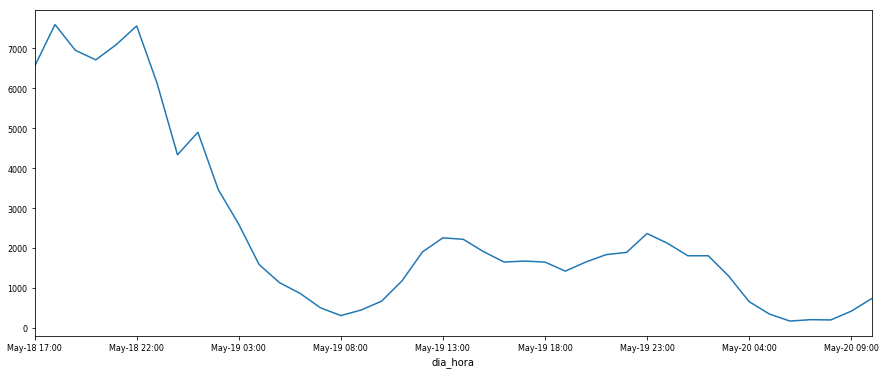

In [120]:
tweets["dia_hora"] = tweets.created_at.dt.strftime("%h-%d %H:00")
gb = tweets.groupby(tweets.dia_hora)["dia_hora"].count()
gb.plot(figsize=(15,6), fontsize=8)

# Tuits más retuiteados

In [121]:
N_RTS = 20

In [122]:
tweets.drop_duplicates(subset=['text'], keep="last", inplace=True)

In [123]:
display_cols = ['original_user_name', 'full_text', 'favorite_count', 'retweet_count']

In [124]:
original_tweets = tweets[tweets.original_id == tweets.id]\
                        .rename(columns={"user_name": "original_user_name"})

tweets = tweets.merge(original_tweets[["original_id", "original_user_name"]],
             how="left", on="original_id")

In [125]:
idx = tweets.groupby(['original_id'])['retweet_count'].transform(max) == tweets['retweet_count']

top_rts = tweets[idx][display_cols].sort_values(by='retweet_count', ascending=False).head(N_RTS)

In [126]:
# Fetch original user names

In [127]:
top_rts

,original_user_name,full_text,favorite_count,retweet_count
26073,NaN,"Mi candidatura tenía una única misión: construir una unidad amplia para defender al trabajo, a los humildes y a la clase media. Ese objetivo está cumplido. Celebro la decisión de Cristina. Felicito a Alberto. #EsConTodos",33727,6177
25953,NaN,ALBERTO FERNÁNDEZ sobre CRISTINA KIRCHNER Una persona sin valores actúa siguiendo su ambición de poder y dinero. ¡Dale RT para DIFUNDIR! #ArrugoCristina https://t.co/jeZO9zvSNF,2425,2796
26006,Alberto Fernández,Gracias @vtolosapaz !!! Vamos a hacer entre todos el pais que los argentinos merecen https://t.co/or64TJWtTR,9085,1835
26097,Matilda_mdq 🇦🇷,"👇👇👇👇 Dice Dady Brieva q lo primero q tienen q hacer #FernandezFernandez después de ganar en primera vuelta es ""liberar a todos los presos políticos"" o sea a todos los delincuentes cómplices de la Jefa de la Banda. Entonces, confirma q a la Justicia la manejarían ellos?!!🤔 https://t.co/NCQ1EEKuS9",2148,1663
25609,NaN,"Si hoy fueran las Elecciones Presidenciales, ¿A quién votarías? #ArrugoCristina",496,1569
25948,NaN,Extraordinaria jugada de @CFKArgentina Madurez y conciencia política al servicio del bienestar de su pueblo. Siempre por su pueblo. La fórmula #FernandezFernandez es sin dudas motivo de esperanza hacia el futuro. Hacia allá vamos. @alferdez Presidente✌🏽,9385,1544
24043,NaN,"Era importante que Cristina viniera al PJ. Ahora tenemos que seguir sumando. Los que no vinieron, diría que se apuren. Sin exitismos ni soberbia. Solo el trabajo cotidiano para reforzar esta unidad puede garantizar un mejor camino para los argentinos. #EsConTodos",6809,1543
26058,alibru,Ahora ya va tomando más color! Ya tenemos más candidatos Y como las encuestadoras dicen cualquier cosa Vos a quién pensas votar? Si no está en la Lista te pido que lo agregue en las respuesta porque no permiten mas opciones RT #ArrugoCristina #BuenSabado #CristinaSomosTodos,529,1507
26070,NaN,CRISTINA censuraba a ALBERTO FERNÁNDEZ en 2012 Alberto Fernández se encontraba en C5N criticándola y de la nada el programa dejó de emitirse y fue a un corte. ¡Dale RT para DIFUNDIR! #ArrugoCristina https://t.co/K99FcLMg5V,1220,1492
25999,NaN,#ArrugoCristina #FernandezFernandez Este video está muy bueno!!! El que lo edito merece mis respetos 😁😀😃😄😉😂☺️ https://t.co/bKOPcWFgrZ,2258,1399


# Tuits más faveados

In [128]:
N_FAVS = 20

In [129]:
idx = tweets.groupby(['original_id'])['favorite_count'].transform(max) == tweets['favorite_count']

tweets[idx][display_cols].sort_values(by='favorite_count', ascending=False).head(N_FAVS)

,original_user_name,full_text,favorite_count,retweet_count
26073,NaN,"Mi candidatura tenía una única misión: construir una unidad amplia para defender al trabajo, a los humildes y a la clase media. Ese objetivo está cumplido. Celebro la decisión de Cristina. Felicito a Alberto. #EsConTodos",33727,6177
25948,NaN,Extraordinaria jugada de @CFKArgentina Madurez y conciencia política al servicio del bienestar de su pueblo. Siempre por su pueblo. La fórmula #FernandezFernandez es sin dudas motivo de esperanza hacia el futuro. Hacia allá vamos. @alferdez Presidente✌🏽,9385,1544
26006,Alberto Fernández,Gracias @vtolosapaz !!! Vamos a hacer entre todos el pais que los argentinos merecen https://t.co/or64TJWtTR,9085,1835
12912,NaN,Durante los años de mayor fortaleza de Cristina estuve políticamente enemistado con el kirchnerismo. Corrió mucha agua bajo el puente. Agradezco su invitación hoy. Voy con gusto. #EsConTodos,8553,1133
24043,NaN,"Era importante que Cristina viniera al PJ. Ahora tenemos que seguir sumando. Los que no vinieron, diría que se apuren. Sin exitismos ni soberbia. Solo el trabajo cotidiano para reforzar esta unidad puede garantizar un mejor camino para los argentinos. #EsConTodos",6809,1543
26093,Felipe Solá,"Sigamos trabajando con humildad y amplitud para que el 10 de diciembre tengamos un gobierno que le devuelva la esperanza a todos los argentinos. Felicitaciones @ZiliottoSergio, nuevo gobernador de La Pampa. #EsConTodos",4064,799
25656,NaN,Una vez más Cristina nos sorprende con una gran decisión. Estoy segura que @alferdez y @CFKArgentina pondrán de pie a la Argentina una vez más e imagino que Néstor desde el cielo acompaña esta determinación. Nosotros militaremos para hacerlo realidad. 🇦🇷☀ #FernandezFernandez https://t.co/oKgjdx2bO2,3939,1236
20844,NaN,"Tras el anuncio de la formula #FernandezFernandez, tanto Felipe Solá como Agustín Rossi decidieron bajar sus candidaturas. Son los primeros coletazos de unos cuantos que llegarán en estos días.",3274,756
22592,NaN,abrazo enorme Felipe! https://t.co/QkWYqIF4c6,2566,442
25953,NaN,ALBERTO FERNÁNDEZ sobre CRISTINA KIRCHNER Una persona sin valores actúa siguiendo su ambición de poder y dinero. ¡Dale RT para DIFUNDIR! #ArrugoCristina https://t.co/jeZO9zvSNF,2425,2796


# Nube de palabras

In [130]:
import gensim
import re

def clean(s):
    s = gensim.utils.deaccent(s)
    s = s.strip().lower()
    s = s.replace("rt ", " ")

    # remove mentions
    s = re.sub(r"@\w+", " ", s)

    # remove URLs
    s = re.sub(r"https?://t\.co/\w+", " ", s)
    s = re.sub(
        r"https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        " ", s)
    s = re.sub(r",", " ", s)
    s = re.sub(r"[^A-Za-z0-9ñ()\'\`#]", " ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)

    return s

In [131]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

def tokenize(s):
    return [t for t in s.strip().split() if (t not in stopwords.words('spanish')
                                             and len(t) > 1
                                             and t[0] != '#'
                                             and t != "si")]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pablogcelayes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
def get_all_tokens(tweets):
    all_tokens = []
    for tuit in tweets.text.apply(clean).unique():
        all_tokens += tokenize(tuit) + ['.']
    return all_tokens

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [134]:
all_tokens = get_all_tokens(tweets.sample(5000))

(-0.5, 799.5, 399.5, -0.5)

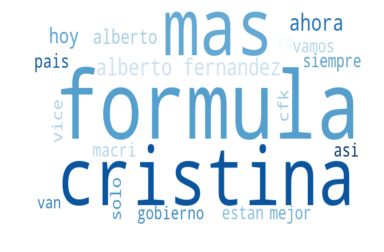

In [135]:
wordcloud = WordCloud(normalize_plurals=False, colormap='Blues', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='white').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

# Top hashtags por volumen de tuits

In [136]:
from collections import Counter

In [137]:
ht_counts = Counter()

for hts in tweets[~tweets.hts.isna()].hts.values:
    for ht in hts.split():
        ht_counts[ht.lower()] += 1

In [138]:
top10_hts = ht_counts.most_common(10)

<BarContainer object of 10 artists>

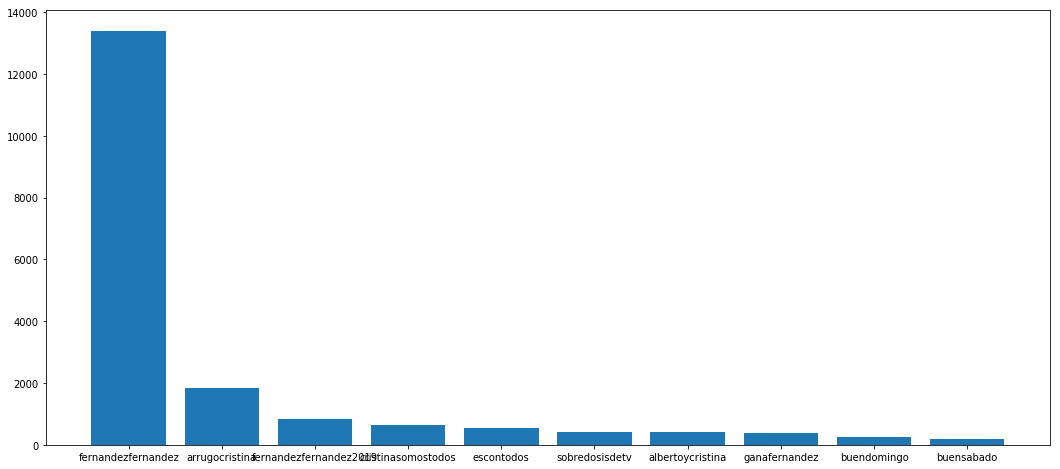

In [139]:
fig, ax = plt.subplots(figsize=(18,8))
plt.bar(*zip(*top10_hts))

In [140]:
top10_hts

[('fernandezfernandez', 13403),
 ('arrugocristina', 1850),
 ('fernandezfernandez2019', 837),
 ('cristinasomostodos', 638),
 ('escontodos', 535),
 ('sobredosisdetv', 409),
 ('albertoycristina', 404),
 ('ganafernandez', 378),
 ('buendomingo', 265),
 ('buensabado', 192)]

# Volumen hashtag por hora

In [141]:
topK = [n for (n, c) in top10_hts[:2]]

In [142]:
tweets.hts = tweets.hts.str.lower()

In [143]:
gb

dia_hora
May-18 17:00    6548
May-18 18:00    7597
May-18 19:00    6951
May-18 20:00    6713
May-18 21:00    7094
May-18 22:00    7563
May-18 23:00    6129
May-19 00:00    4334
May-19 01:00    4899
May-19 02:00    3461
May-19 03:00    2595
May-19 04:00    1584
May-19 05:00    1131
May-19 06:00    864 
May-19 07:00    503 
May-19 08:00    307 
May-19 09:00    446 
May-19 10:00    668 
May-19 11:00    1177
May-19 12:00    1901
May-19 13:00    2254
May-19 14:00    2217
May-19 15:00    1906
May-19 16:00    1648
May-19 17:00    1672
May-19 18:00    1647
May-19 19:00    1420
May-19 20:00    1648
May-19 21:00    1833
May-19 22:00    1890
May-19 23:00    2362
May-20 00:00    2119
May-20 01:00    1805
May-20 02:00    1805
May-20 03:00    1296
May-20 04:00    656 
May-20 05:00    344 
May-20 06:00    169 
May-20 07:00    204 
May-20 08:00    197 
May-20 09:00    416 
May-20 10:00    730 
Name: dia_hora, dtype: int64

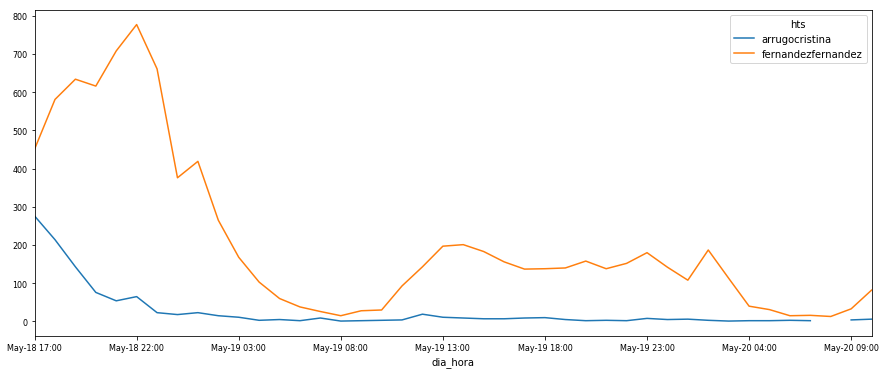

In [145]:
tweets_ht = tweets[tweets.hts.isin(topK)]
gb = tweets_ht.groupby([tweets_ht.dia_hora, tweets_ht.hts])["dia_hora"].count()
gb = gb.unstack()
gb.plot(figsize=(15,6), fontsize=8)

(-0.5, 799.5, 399.5, -0.5)

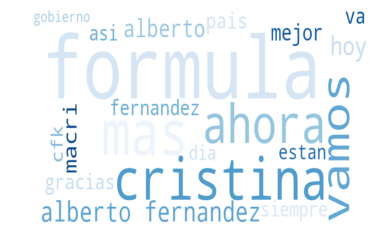

In [146]:
all_tokens = get_all_tokens(tweets[tweets.hts == "fernandezfernandez"].sample(5000))
wordcloud = WordCloud(normalize_plurals=False, colormap='Blues', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='white').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

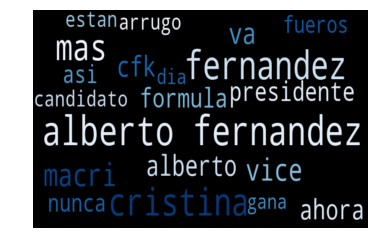

In [147]:
all_tokens = get_all_tokens(tweets[tweets.hts == "arrugocristina"])
wordcloud = WordCloud(normalize_plurals=False, colormap='Blues', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='black').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")